Converting normal images to grayscale...
Converting defect images (with subfolders) to grayscale...


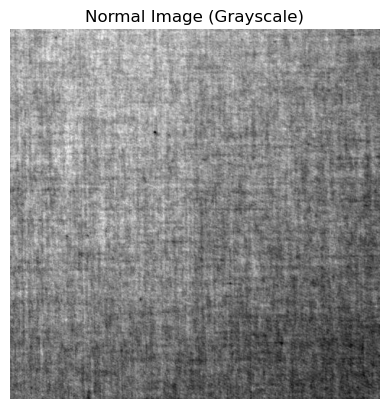

Normal Image - 3x3 Top-left Window Values:
 [[165 168 172]
 [165 170 173]
 [162 169 173]]
Normal Image - Image shape: (512, 512)
Normal Image - Number of channels: 1
-----



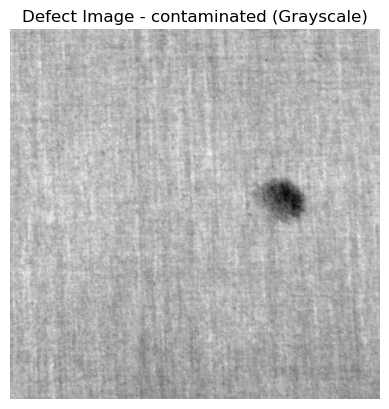

Defect Image - contaminated - 3x3 Top-left Window Values:
 [[179 184 180]
 [184 186 183]
 [187 186 186]]
Defect Image - contaminated - Image shape: (512, 512)
Defect Image - contaminated - Number of channels: 1
-----



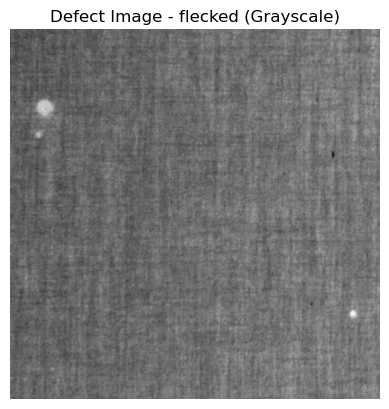

Defect Image - flecked - 3x3 Top-left Window Values:
 [[162 161 164]
 [166 165 165]
 [165 166 167]]
Defect Image - flecked - Image shape: (512, 512)
Defect Image - flecked - Number of channels: 1
-----



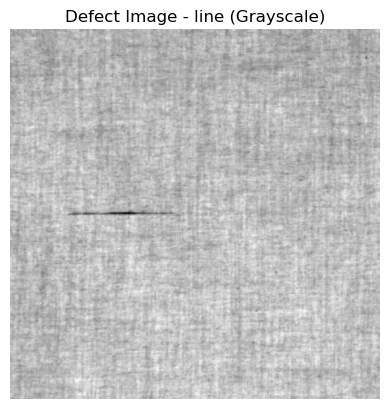

Defect Image - line - 3x3 Top-left Window Values:
 [[205 203 200]
 [205 204 202]
 [206 203 200]]
Defect Image - line - Image shape: (512, 512)
Defect Image - line - Number of channels: 1
-----



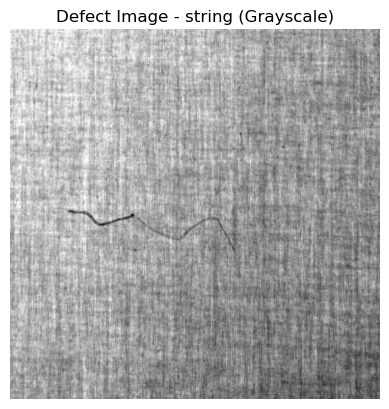

Defect Image - string - 3x3 Top-left Window Values:
 [[248 243 242]
 [250 244 241]
 [247 241 238]]
Defect Image - string - Image shape: (512, 512)
Defect Image - string - Number of channels: 1
-----



In [29]:


import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set input folder paths (deduplicated images)
normal_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal'
defect_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect'

# Set output folder paths for grayscale images
normal_gray_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal_gray'
defect_gray_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect_gray'

# Create output folders if they don't exist
os.makedirs(normal_gray_folder, exist_ok=True)
os.makedirs(defect_gray_folder, exist_ok=True)

# Define supported image extensions
image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')

# --- Function to convert a flat folder to grayscale ---
def convert_flat_folder_to_grayscale(input_folder, output_folder):
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(image_extensions):
            img_path = os.path.join(input_folder, filename)
            try:
                img = Image.open(img_path).convert('L')  # Convert to grayscale ('L' mode)
                img.save(os.path.join(output_folder, filename))
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

# --- Function to convert a folder with subfolders to grayscale ---
def convert_recursive_to_grayscale(input_parent_folder, output_parent_folder):
    # Iterate over each subfolder in the input parent folder
    for subfolder in os.listdir(input_parent_folder):
        input_subfolder_path = os.path.join(input_parent_folder, subfolder)
        if os.path.isdir(input_subfolder_path):
            # Create corresponding subfolder in the output
            output_subfolder_path = os.path.join(output_parent_folder, subfolder)
            os.makedirs(output_subfolder_path, exist_ok=True)
            # Process images in the subfolder
            for filename in os.listdir(input_subfolder_path):
                if filename.lower().endswith(image_extensions):
                    img_path = os.path.join(input_subfolder_path, filename)
                    try:
                        img = Image.open(img_path).convert('L')
                        img.save(os.path.join(output_subfolder_path, filename))
                    except Exception as e:
                        print(f"Error processing {img_path}: {e}")

# --- Convert images to grayscale ---
print("Converting normal images to grayscale...")
convert_flat_folder_to_grayscale(normal_folder, normal_gray_folder)
print("Converting defect images (with subfolders) to grayscale...")
convert_recursive_to_grayscale(defect_folder, defect_gray_folder)

# --- Function to display image details ---
def display_and_print_details(image_path, title):
    try:
        img = Image.open(image_path)
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")
        return
    img_array = np.array(img)

    # Display image using matplotlib
    plt.imshow(img_array, cmap='gray')
    plt.title(f"{title} (Grayscale)")
    plt.axis('off')
    plt.show()

    # Print 3x3 top-left pixel values and image details
    print(f"{title} - 3x3 Top-left Window Values:\n", img_array[:3, :3])
    print(f"{title} - Image shape: {img_array.shape}")
    # For grayscale images, the array shape will be 2D; we use 1 channel if shape is 2D.
    num_channels = 1 if len(img_array.shape) == 2 else img_array.shape[2]
    print(f"{title} - Number of channels: {num_channels}")
    print("-----\n")

# --- Display and print details for sample images ---
# For Normal images (flat folder)
try:
    normal_sample = os.path.join(normal_gray_folder, os.listdir(normal_gray_folder)[0])
    display_and_print_details(normal_sample, "Normal Image")
except IndexError:
    print("No images found in normal_gray folder.")

# For Defect images (with subfolders)
# Iterate over each subfolder in the defect grayscale folder and display one sample image from each.
for subfolder in os.listdir(defect_gray_folder):
    subfolder_path = os.path.join(defect_gray_folder, subfolder)
    if os.path.isdir(subfolder_path):
        files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(image_extensions)]
        if files:
            sample_image_path = os.path.join(subfolder_path, files[0])
            display_and_print_details(sample_image_path, f"Defect Image - {subfolder}")
        else:
            print(f"No images found in {subfolder_path}")


In [33]:
import os
from PIL import Image
import numpy as np

# Define the parent folder path (which includes subfolders)
parent_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect_gray'  # adjust as needed

# Define valid image extensions
image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')

def is_image_grayscale(image_path):
    """
    Check if an image is grayscale.
    
    First, it checks the Pillow image mode. If it's 'L', it's grayscale.
    If the mode is 'RGB' or similar, it checks if all color channels are nearly equal.
    """
    try:
        img = Image.open(image_path)
        # If the mode is 'L', it's grayscale.
        if img.mode == 'L':
            return True

        # Convert image data to a numpy array
        img_array = np.array(img)
        
        # If the image array is 2D (height, width), it's grayscale.
        if len(img_array.shape) == 2:
            return True
        
        # For images with a 3rd dimension (channels)
        if len(img_array.shape) == 3:
            # If it has one channel or the channels are nearly identical, consider grayscale.
            if img_array.shape[2] == 1:
                return True
            elif img_array.shape[2] >= 3:
                # Check if all channels are almost the same using np.allclose
                r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
                if np.allclose(r, g, atol=1) and np.allclose(g, b, atol=1):
                    return True
                
        # Otherwise, assume it's not grayscale.
        return False
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return False

# Traverse the directory tree
for root, dirs, files in os.walk(parent_folder):
    for file in files:
        if file.lower().endswith(image_extensions):
            image_path = os.path.join(root, file)
            grayscale = is_image_grayscale(image_path)
            print(f"Image: {image_path}")
            print(f"Is Grayscale? {'Yes' if grayscale else 'No'}\n")


Image: C:\Users\Global\Fabric project\WFDD\grey cloth\defect_gray\contaminated\001.png
Is Grayscale? Yes

Image: C:\Users\Global\Fabric project\WFDD\grey cloth\defect_gray\contaminated\002.png
Is Grayscale? Yes

Image: C:\Users\Global\Fabric project\WFDD\grey cloth\defect_gray\contaminated\003.png
Is Grayscale? Yes

Image: C:\Users\Global\Fabric project\WFDD\grey cloth\defect_gray\contaminated\004.png
Is Grayscale? Yes

Image: C:\Users\Global\Fabric project\WFDD\grey cloth\defect_gray\contaminated\005.png
Is Grayscale? Yes

Image: C:\Users\Global\Fabric project\WFDD\grey cloth\defect_gray\contaminated\006.png
Is Grayscale? Yes

Image: C:\Users\Global\Fabric project\WFDD\grey cloth\defect_gray\contaminated\007.png
Is Grayscale? Yes

Image: C:\Users\Global\Fabric project\WFDD\grey cloth\defect_gray\contaminated\008.png
Is Grayscale? Yes

Image: C:\Users\Global\Fabric project\WFDD\grey cloth\defect_gray\contaminated\009.png
Is Grayscale? Yes

Image: C:\Users\Global\Fabric project\WFDD\gre

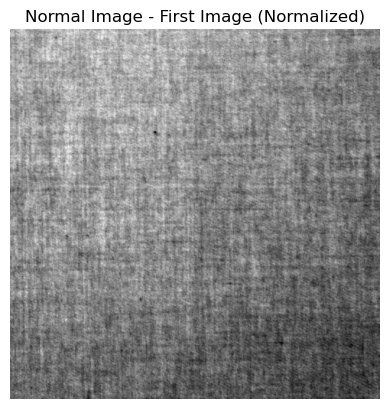

Normal Image - 3x3 Top-left Window (Normalized) Values:
 [[0.64705882 0.65882353 0.6745098 ]
 [0.64705882 0.66666667 0.67843137]
 [0.63529412 0.6627451  0.67843137]]
Normal Image - Image shape: (512, 512)
Normal Image - Number of channels: 1
-----

Normal Image - Total images processed and saved: 309



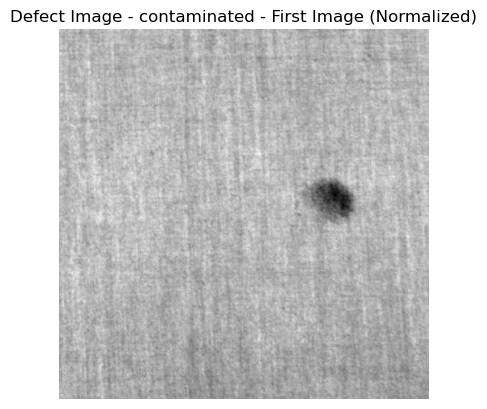

Defect Image [contaminated] - 3x3 Top-left Window (Normalized) Values:
 [[0.70196078 0.72156863 0.70588235]
 [0.72156863 0.72941176 0.71764706]
 [0.73333333 0.72941176 0.72941176]]
Defect Image [contaminated] - Image shape: (512, 512)
Defect Image [contaminated] - Number of channels: 1
-----

Defect Image [contaminated] - Total images processed and saved: 20



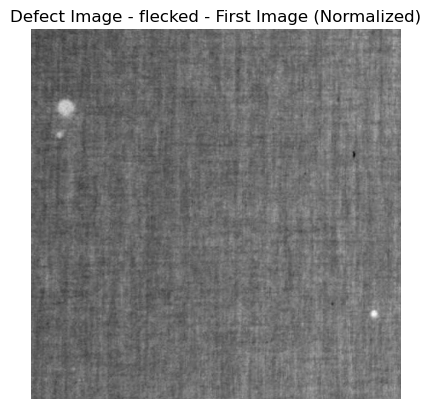

Defect Image [flecked] - 3x3 Top-left Window (Normalized) Values:
 [[0.63529412 0.63137255 0.64313725]
 [0.65098039 0.64705882 0.64705882]
 [0.64705882 0.65098039 0.65490196]]
Defect Image [flecked] - Image shape: (512, 512)
Defect Image [flecked] - Number of channels: 1
-----

Defect Image [flecked] - Total images processed and saved: 14



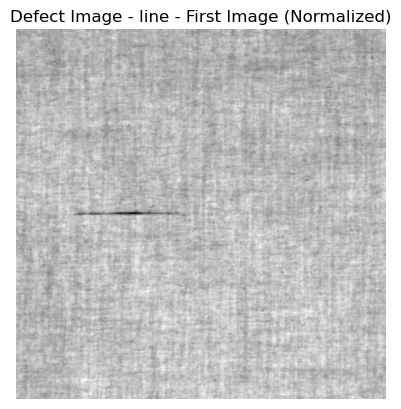

Defect Image [line] - 3x3 Top-left Window (Normalized) Values:
 [[0.80392157 0.79607843 0.78431373]
 [0.80392157 0.8        0.79215686]
 [0.80784314 0.79607843 0.78431373]]
Defect Image [line] - Image shape: (512, 512)
Defect Image [line] - Number of channels: 1
-----

Defect Image [line] - Total images processed and saved: 9



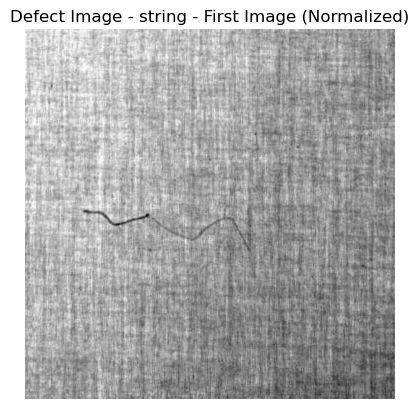

Defect Image [string] - 3x3 Top-left Window (Normalized) Values:
 [[0.97254902 0.95294118 0.94901961]
 [0.98039216 0.95686275 0.94509804]
 [0.96862745 0.94509804 0.93333333]]
Defect Image [string] - Image shape: (512, 512)
Defect Image [string] - Number of channels: 1
-----

Defect Image [string] - Total images processed and saved: 16



In [35]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Set paths to final grayscale image folders
normal_gray_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal_gray'
defect_gray_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect_gray'

# Set output folder paths for normalized images
normal_normalized_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal_normalized'
defect_normalized_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect_normalized'

# Create output folders if they don't exist
os.makedirs(normal_normalized_folder, exist_ok=True)
os.makedirs(defect_normalized_folder, exist_ok=True)

# Function to normalize grayscale image (pixel values scaled to [0, 1])
def normalize_image(image_array):
    return image_array / 255.0

# --- Function to process a flat folder (for normal images) ---
def process_and_save_all_images(input_folder, output_folder, title):
    image_files = [f for f in os.listdir(input_folder) 
                   if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif'))]
    
    if not image_files:
        print(f"No image files found in {input_folder}")
        return
    
    for i, file_name in enumerate(image_files):
        file_path = os.path.join(input_folder, file_name)
        # Open image and ensure it is grayscale
        img = Image.open(file_path).convert('L')
        img_array = np.array(img)

        # Normalize the image array
        normalized_array = normalize_image(img_array)

        # Save normalized image (convert back to 8-bit format)
        normalized_img = Image.fromarray((normalized_array * 255).astype(np.uint8))
        normalized_img.save(os.path.join(output_folder, file_name))

        # Display and print info for the first image in the folder
        if i == 0:
            plt.imshow(normalized_array, cmap='gray')
            plt.title(f"{title} - First Image (Normalized)")
            plt.axis('off')
            plt.show()
            
            print(f"{title} - 3x3 Top-left Window (Normalized) Values:\n", normalized_array[:3, :3])
            print(f"{title} - Image shape: {normalized_array.shape}")
            print(f"{title} - Number of channels: {1 if len(normalized_array.shape)==2 else normalized_array.shape[2]}")
            print("-----\n")

    print(f"{title} - Total images processed and saved: {len(image_files)}\n")

# --- Function to process images in a folder with subfolders (for defect images) ---
def process_and_save_images_recursive(input_parent_folder, output_parent_folder, title):
    # Iterate over each subfolder in the input_parent_folder
    for subfolder in os.listdir(input_parent_folder):
        input_subfolder_path = os.path.join(input_parent_folder, subfolder)
        if os.path.isdir(input_subfolder_path):
            # Create corresponding subfolder in the output parent folder
            output_subfolder_path = os.path.join(output_parent_folder, subfolder)
            os.makedirs(output_subfolder_path, exist_ok=True)

            # Get valid image files in the current subfolder
            image_files = [f for f in os.listdir(input_subfolder_path) 
                           if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif'))]
            
            if not image_files:
                print(f"No image files found in {input_subfolder_path}")
                continue
            
            for i, file_name in enumerate(image_files):
                file_path = os.path.join(input_subfolder_path, file_name)
                img = Image.open(file_path).convert('L')
                img_array = np.array(img)

                normalized_array = normalize_image(img_array)

                # Save normalized image
                normalized_img = Image.fromarray((normalized_array * 255).astype(np.uint8))
                normalized_img.save(os.path.join(output_subfolder_path, file_name))

                # For the first image in each subfolder, display the image and pixel info.
                if i == 0:
                    plt.imshow(normalized_array, cmap='gray')
                    plt.title(f"{title} - {subfolder} - First Image (Normalized)")
                    plt.axis('off')
                    plt.show()
                    
                    print(f"{title} [{subfolder}] - 3x3 Top-left Window (Normalized) Values:\n", normalized_array[:3, :3])
                    print(f"{title} [{subfolder}] - Image shape: {normalized_array.shape}")
                    print(f"{title} [{subfolder}] - Number of channels: {1 if len(normalized_array.shape)==2 else normalized_array.shape[2]}")
                    print("-----\n")

            print(f"{title} [{subfolder}] - Total images processed and saved: {len(image_files)}\n")

# Process normal images (flat folder)
process_and_save_all_images(normal_gray_folder, normal_normalized_folder, "Normal Image")

# Process defect images (with subfolders)
process_and_save_images_recursive(defect_gray_folder, defect_normalized_folder, "Defect Image")


In [37]:
import os
import cv2
import numpy as np
from skimage import restoration, img_as_float, img_as_ubyte
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

# ===============================
# Step 1: Define Folder Paths
# ===============================
normal_input_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal_normalized'
defect_input_parent_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect_normalized'

normal_output_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\denoised_normal'
defect_output_parent_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\denoised_defect'

# Create output folders for normal images if they don't exist
os.makedirs(normal_output_folder, exist_ok=True)
# Create the parent folder for defect outputs
os.makedirs(defect_output_parent_folder, exist_ok=True)

# Define valid image extensions
image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')

# ===============================
# Step 2: Define the Processing Function for a Flat Folder
# ===============================
def process_folder(input_folder, output_folder, folder_label="Image"):
    """
    Process each image in the input folder (normalized grayscale images):
      - Apply wavelet denoising using BayesShrink.
      - Compute PSNR and SSIM metrics.
      - Save the denoised image to the output folder.
    """
    files = [f for f in os.listdir(input_folder) if f.lower().endswith(image_extensions)]
    print(f"Found {len(files)} images in {input_folder}...\n")
    
    if len(files) == 0:
        print(f"No image files found in folder: {input_folder}")
        return
    
    for file in files:
        input_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)
        
        # Load the normalized grayscale image.
        img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error reading image: {file}. Skipping...")
            continue
        
        img_float = img_as_float(img)  # Pixel values in [0, 1]
        
        # Apply Wavelet Denoising using BayesShrink
        denoised = restoration.denoise_wavelet(
            img_float,
            method='BayesShrink',
            mode='soft',
            rescale_sigma=True
        )
        
        # Compute PSNR and SSIM metrics
        psnr_value = psnr(img_float, denoised, data_range=1.0)
        ssim_value = ssim(img_float, denoised, data_range=1.0)
        
        print(f"Processing '{file}' in {folder_label}")
        print(f"PSNR: {psnr_value:.2f} dB, SSIM: {ssim_value:.4f}\n")
        
        # Clip, convert, and save the denoised image
        denoised_clipped = np.clip(denoised, 0, 1)
        denoised_uint8 = img_as_ubyte(denoised_clipped)
        
        try:
            success = cv2.imwrite(output_path, denoised_uint8)
            if success:
                print(f"Successfully saved: {file}\n")
            else:
                print(f"Failed to save: {file}\n")
        except Exception as e:
            print(f"Error saving image {file}: {e}")
            
# ===============================
# Step 3: Process the Normal Images (Flat Folder)
# ===============================
print("Processing Normal Images...\n")
process_folder(normal_input_folder, normal_output_folder, folder_label="Normal Image")

# ===============================
# Step 4: Process the Defect Images Recursively
# ===============================
print("Processing Defective Images...\n")

# Iterate over each subfolder in the defect input parent folder
for subfolder in os.listdir(defect_input_parent_folder):
    input_subfolder_path = os.path.join(defect_input_parent_folder, subfolder)
    if os.path.isdir(input_subfolder_path):
        # Create corresponding subfolder in the defect output parent folder
        output_subfolder_path = os.path.join(defect_output_parent_folder, subfolder)
        os.makedirs(output_subfolder_path, exist_ok=True)
        
        print(f"Processing defect type: {subfolder}\n")
        process_folder(input_subfolder_path, output_subfolder_path, folder_label=f"Defect Image [{subfolder}]")


Processing Normal Images...

Found 309 images in C:\Users\Global\Fabric project\WFDD\grey cloth\normal_normalized...

Processing 'img1.png' in Normal Image
PSNR: 49.19 dB, SSIM: 0.9912

Successfully saved: img1.png

Processing 'img10.png' in Normal Image
PSNR: 48.92 dB, SSIM: 0.9903

Successfully saved: img10.png

Processing 'img100.png' in Normal Image
PSNR: 49.72 dB, SSIM: 0.9938

Successfully saved: img100.png

Processing 'img101.png' in Normal Image
PSNR: 50.14 dB, SSIM: 0.9946

Successfully saved: img101.png

Processing 'img102.png' in Normal Image
PSNR: 49.49 dB, SSIM: 0.9936

Successfully saved: img102.png

Processing 'img103.png' in Normal Image
PSNR: 49.04 dB, SSIM: 0.9922

Successfully saved: img103.png

Processing 'img104.png' in Normal Image
PSNR: 49.40 dB, SSIM: 0.9928

Successfully saved: img104.png

Processing 'img105.png' in Normal Image
PSNR: 48.90 dB, SSIM: 0.9916

Successfully saved: img105.png

Processing 'img106.png' in Normal Image
PSNR: 49.42 dB, SSIM: 0.9932

Su

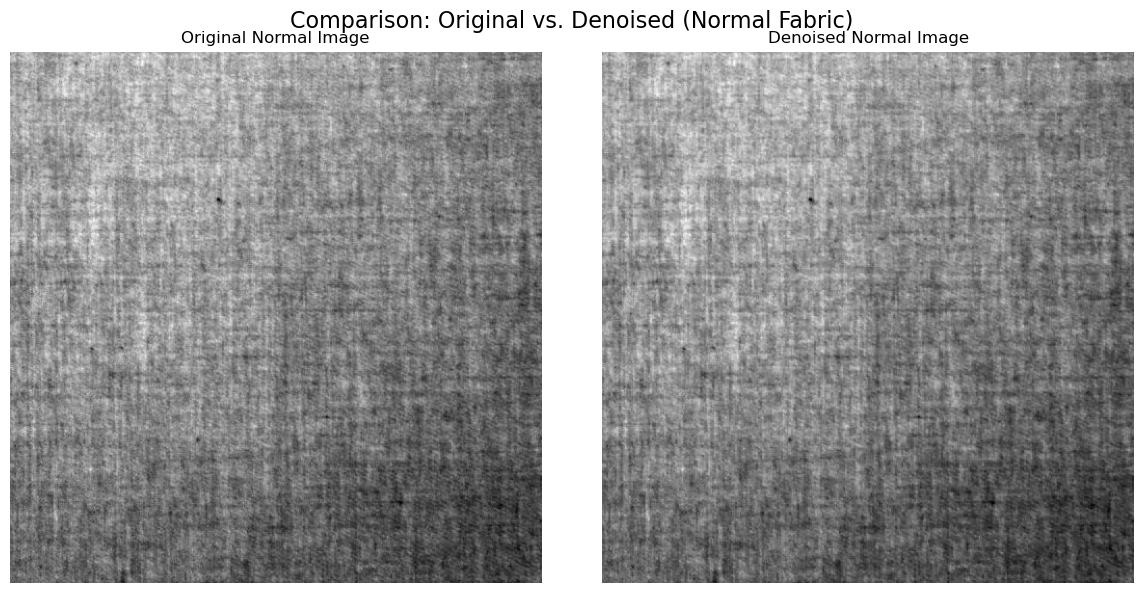

In [39]:
# Step 7: Optional - Visualize a Sample Comparison for Normal Images
# ===============================
# For demonstration, display the first image from the normal folder before and after denoising.
sample_file = os.listdir(normal_input_folder)[0]
sample_input_path = os.path.join(normal_input_folder, sample_file)
sample_output_path = os.path.join(normal_output_folder, sample_file)

orig_sample = cv2.imread(sample_input_path, cv2.IMREAD_GRAYSCALE)
denoised_sample = cv2.imread(sample_output_path, cv2.IMREAD_GRAYSCALE)

# Show before and after denoising images
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(orig_sample, cmap='gray')
plt.title("Original Normal Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_sample, cmap='gray')
plt.title("Denoised Normal Image")
plt.axis('off')

plt.suptitle("Comparison: Original vs. Denoised (Normal Fabric)", fontsize=16)
plt.tight_layout()
plt.show()


Visualizing sample comparisons for each defect type...



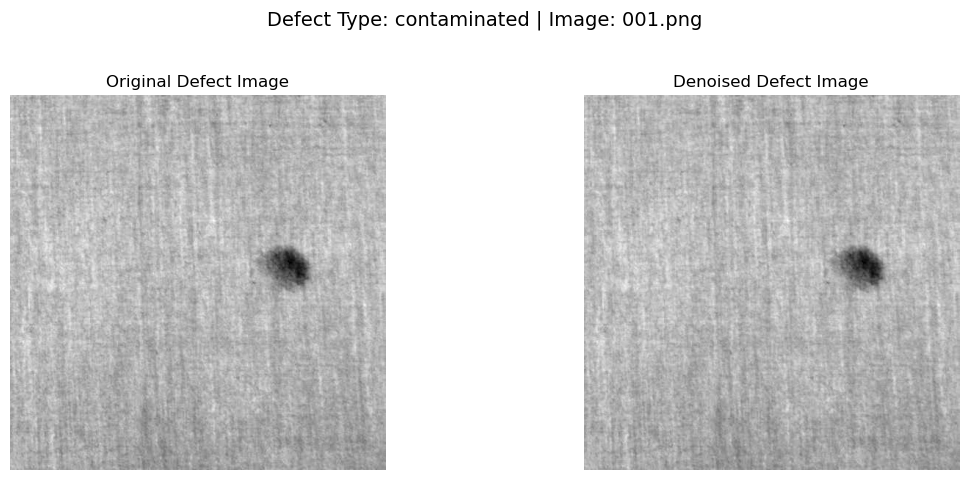

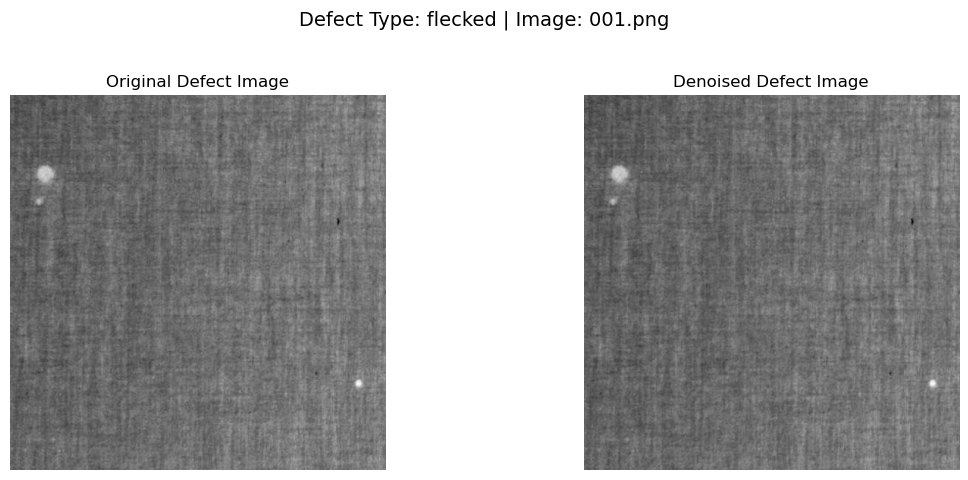

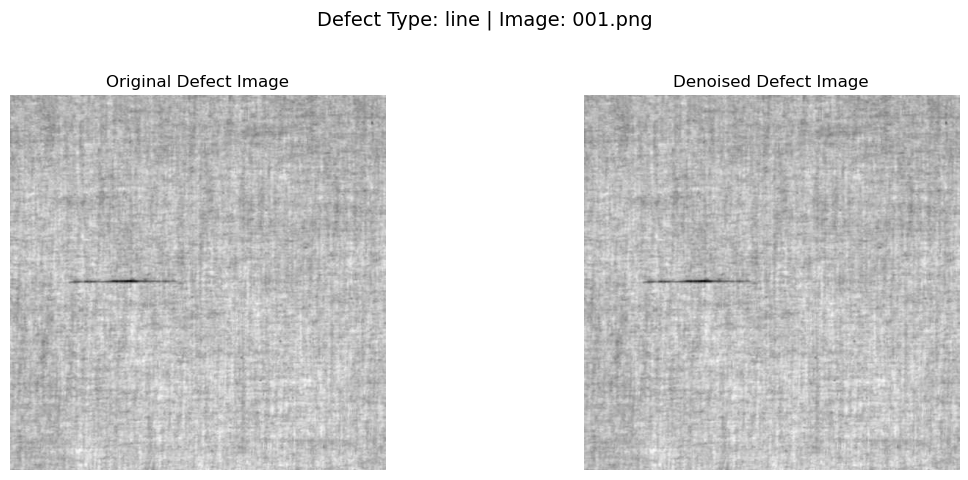

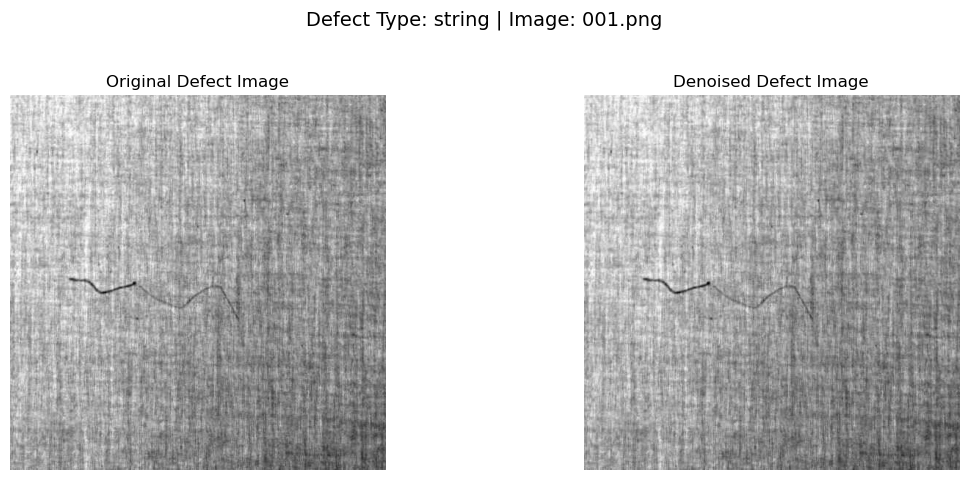

In [41]:
import matplotlib.pyplot as plt

# ===============================
# Step 7: Visualize One Image per Defect Type
# ===============================
print("Visualizing sample comparisons for each defect type...\n")

for subfolder in os.listdir(defect_input_parent_folder):
    input_subfolder_path = os.path.join(defect_input_parent_folder, subfolder)
    output_subfolder_path = os.path.join(defect_output_parent_folder, subfolder)

    if os.path.isdir(input_subfolder_path):
        image_files = [f for f in os.listdir(input_subfolder_path) if f.lower().endswith(image_extensions)]

        if len(image_files) == 0:
            print(f"No images found in: {subfolder}")
            continue

        sample_file = image_files[0]
        input_image_path = os.path.join(input_subfolder_path, sample_file)
        output_image_path = os.path.join(output_subfolder_path, sample_file)

        # Read both original and denoised grayscale images
        orig_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
        denoised_image = cv2.imread(output_image_path, cv2.IMREAD_GRAYSCALE)

        if orig_image is None or denoised_image is None:
            print(f"Could not load images from: {subfolder}. Skipping visualization.")
            continue

        # Plot side-by-side
        plt.figure(figsize=(12, 5))
        plt.suptitle(f"Defect Type: {subfolder} | Image: {sample_file}", fontsize=14)

        plt.subplot(1, 2, 1)
        plt.imshow(orig_image, cmap='gray')
        plt.title("Original Defect Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(denoised_image, cmap='gray')
        plt.title("Denoised Defect Image")
        plt.axis('off')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


In [43]:
# ===============================
# Step 8–10: Process Each Defect Type Folder and Compute Metrics
# ===============================

def process_folder_with_metrics(input_folder, output_folder):
    """
    Process each image in a folder and compute PSNR and SSIM metrics.
    Returns lists of PSNR and SSIM values.
    """
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')
    files = [f for f in os.listdir(input_folder) if f.lower().endswith(image_extensions)]

    psnr_values = []
    ssim_values = []

    for file in files:
        input_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Skipping invalid image: {file}")
            continue

        img_float = img_as_float(img)

        # Apply wavelet denoising
        denoised = restoration.denoise_wavelet(
            img_float,
            method='BayesShrink',
            mode='soft',
            rescale_sigma=True
        )

        # Calculate metrics
        psnr_value = psnr(img_float, denoised, data_range=1.0)
        ssim_value = ssim(img_float, denoised, data_range=1.0)

        print(f"Processing '{file}' | PSNR: {psnr_value:.2f} dB, SSIM: {ssim_value:.4f}")

        # Save denoised image
        denoised_clipped = np.clip(denoised, 0, 1)
        denoised_uint8 = img_as_ubyte(denoised_clipped)
        cv2.imwrite(output_path, denoised_uint8)

        # Append metrics
        psnr_values.append(psnr_value)
        ssim_values.append(ssim_value)

    return psnr_values, ssim_values


# ===============================
# Step 9: Process All Subfolders in Defect Folder
# ===============================

overall_psnr = []
overall_ssim = []

print("\n=== Processing All Defect Types ===\n")

for subfolder in os.listdir(defect_input_parent_folder):
    input_subfolder_path = os.path.join(defect_input_parent_folder, subfolder)
    output_subfolder_path = os.path.join(defect_output_parent_folder, subfolder)

    if not os.path.isdir(input_subfolder_path):
        continue

    print(f"\n--- Defect Type: {subfolder} ---")
    os.makedirs(output_subfolder_path, exist_ok=True)

    psnr_values, ssim_values = process_folder_with_metrics(input_subfolder_path, output_subfolder_path)

    if psnr_values and ssim_values:
        avg_psnr = np.mean(psnr_values)
        avg_ssim = np.mean(ssim_values)
        print(f"Average PSNR for '{subfolder}': {avg_psnr:.2f} dB")
        print(f"Average SSIM for '{subfolder}': {avg_ssim:.4f}")
        overall_psnr.extend(psnr_values)
        overall_ssim.extend(ssim_values)
    else:
        print(f"No valid images in subfolder: {subfolder}")

# ===============================
# Step 10: Print Overall Averages
# ===============================
print("\n===== Overall Defect Image Summary =====")
if overall_psnr and overall_ssim:
    print(f"Overall Avg PSNR: {np.mean(overall_psnr):.2f} dB")
    print(f"Overall Avg SSIM: {np.mean(overall_ssim):.4f}")
else:
    print("No valid images processed in any defect folder.")



=== Processing All Defect Types ===


--- Defect Type: contaminated ---
Processing '001.png' | PSNR: 55.96 dB, SSIM: 0.9982
Processing '002.png' | PSNR: 59.37 dB, SSIM: 0.9994
Processing '003.png' | PSNR: 57.21 dB, SSIM: 0.9986
Processing '004.png' | PSNR: 56.95 dB, SSIM: 0.9986
Processing '005.png' | PSNR: 57.76 dB, SSIM: 0.9987
Processing '006.png' | PSNR: 56.64 dB, SSIM: 0.9984
Processing '007.png' | PSNR: 50.66 dB, SSIM: 0.9948
Processing '008.png' | PSNR: 56.05 dB, SSIM: 0.9985
Processing '009.png' | PSNR: 57.40 dB, SSIM: 0.9989
Processing '010.png' | PSNR: 56.40 dB, SSIM: 0.9985
Processing '011.png' | PSNR: 56.87 dB, SSIM: 0.9988
Processing '012.png' | PSNR: 50.49 dB, SSIM: 0.9958
Processing '013.png' | PSNR: 51.02 dB, SSIM: 0.9953
Processing '014.png' | PSNR: 57.82 dB, SSIM: 0.9990
Processing '015.png' | PSNR: 56.18 dB, SSIM: 0.9986
Processing '016.png' | PSNR: 55.97 dB, SSIM: 0.9982
Processing '017.png' | PSNR: 57.29 dB, SSIM: 0.9987
Processing '018.png' | PSNR: 56.22 dB, SSIM

In [47]:
# ===============================
# Step 8: Process Normal Folder and Return PSNR & SSIM
# ===============================
def process_folder_with_metrics(input_folder, output_folder):
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')
    files = [f for f in os.listdir(input_folder) if f.lower().endswith(image_extensions)]

    psnr_values = []
    ssim_values = []

    for file in files:
        input_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Skipping invalid image: {file}")
            continue

        img_float = img_as_float(img)

        denoised = restoration.denoise_wavelet(
            img_float,
            method='BayesShrink',
            mode='soft',
            rescale_sigma=True
        )

        psnr_value = psnr(img_float, denoised, data_range=1.0)
        ssim_value = ssim(img_float, denoised, data_range=1.0)

        print(f"Processing '{file}'")
        print(f"PSNR: {psnr_value:.2f} dB, SSIM: {ssim_value:.4f}\n")

        denoised_clipped = np.clip(denoised, 0, 1)
        denoised_uint8 = img_as_ubyte(denoised_clipped)
        cv2.imwrite(output_path, denoised_uint8)

        psnr_values.append(psnr_value)
        ssim_values.append(ssim_value)

    return psnr_values, ssim_values


# ===============================
# Step 9–10: Process and Print Metrics for Normal Folder Only
# ===============================
print("=== Processing Normal Folder ===")
normal_psnr, normal_ssim = process_folder_with_metrics(normal_input_folder, normal_output_folder)

print("\n===== Summary for Normal Images =====")
print(f"Average PSNR: {np.mean(normal_psnr):.2f} dB")
print(f"Average SSIM: {np.mean(normal_ssim):.4f}")


=== Processing Normal Folder ===
Processing 'img1.png'
PSNR: 49.19 dB, SSIM: 0.9912

Processing 'img10.png'
PSNR: 48.92 dB, SSIM: 0.9903

Processing 'img100.png'
PSNR: 49.72 dB, SSIM: 0.9938

Processing 'img101.png'
PSNR: 50.14 dB, SSIM: 0.9946

Processing 'img102.png'
PSNR: 49.49 dB, SSIM: 0.9936

Processing 'img103.png'
PSNR: 49.04 dB, SSIM: 0.9922

Processing 'img104.png'
PSNR: 49.40 dB, SSIM: 0.9928

Processing 'img105.png'
PSNR: 48.90 dB, SSIM: 0.9916

Processing 'img106.png'
PSNR: 49.42 dB, SSIM: 0.9932

Processing 'img107.png'
PSNR: 49.74 dB, SSIM: 0.9931

Processing 'img108.png'
PSNR: 44.64 dB, SSIM: 0.9802

Processing 'img109.png'
PSNR: 50.16 dB, SSIM: 0.9942

Processing 'img11.png'
PSNR: 48.95 dB, SSIM: 0.9919

Processing 'img110.png'
PSNR: 44.80 dB, SSIM: 0.9816

Processing 'img111.png'
PSNR: 49.19 dB, SSIM: 0.9910

Processing 'img112.png'
PSNR: 49.48 dB, SSIM: 0.9925

Processing 'img113.png'
PSNR: 49.02 dB, SSIM: 0.9899

Processing 'img114.png'
PSNR: 49.28 dB, SSIM: 0.9913


In [3]:
import os
import cv2
import numpy as np

# Folder paths
input_folder =  r'C:\Users\Global\Fabric project\WFDD\grey cloth\final_normal'  # Replace with your input folder path
output_folder =  r'C:\Users\Global\Fabric project\WFDD\grey cloth\final_normal_3'    # Replace with your output folder path

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

def grayscale_to_color_normalized(image):
    # Normalize if not already in [0, 1]
    if image.max() > 1.0:
        image = image / 255.0

    # Convert grayscale image to 3-channel normalized image
    color_image = np.stack([image, image, image], axis=-1)
    return color_image

# Process all image files in the folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
        # Read image in grayscale
        gray_path = os.path.join(input_folder, filename)
        gray_image = cv2.imread(gray_path, cv2.IMREAD_GRAYSCALE)

        if gray_image is None:
            print(f"Could not read image: {filename}")
            continue

        # Convert to normalized color image
        color_image_normalized = grayscale_to_color_normalized(gray_image)

        # Optional: Save the normalized image as a visual reference (rescaled for saving)
        color_image_to_save = (color_image_normalized * 255).astype(np.uint8)
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, color_image_to_save)

        print(f"Processed and saved: {filename}")

print("All images converted successfully.")


Processed and saved: 01d810e4f3264486903b42fe4a30daf6.png
Processed and saved: 023b4d36ae71423dbe8577b13a421c4f.png
Processed and saved: 0267b3f8020740e88f6619cf1fa25303.png
Processed and saved: 0292ae84db5d4bd88e0b0d190489eb93.png
Processed and saved: 041736bde91344a9835e484118c878e0.png
Processed and saved: 046fd712f6174dc7bb16880007a30240.png
Processed and saved: 04816f9472ec44dfa0580b17860a7540.png
Processed and saved: 05e324a3874a4d39ad4b4e16dd729913.png
Processed and saved: 069a70c59fd64b2e9a0528d235b67e3c.png
Processed and saved: 072f5c168ca64a74ac4b9f719cf46029.png
Processed and saved: 083fdd84353746c4af03a776fd59d647.png
Processed and saved: 0da23f92351942cd98ce113d509da9ba.png
Processed and saved: 0f7192e7720b4befbb9911196b7aa8d8.png
Processed and saved: 1095f3df18664c5baac3b764a5d5aa2f.png
Processed and saved: 1135b149a039421ea3e83bb627b0c2df.png
Processed and saved: 117d3229f8e646d68134d3027eca12fa.png
Processed and saved: 13b7b46e45d6452e91e3392a86c41b31.png
Processed and 

In [17]:
import os
import shutil
import random

# Path to the folder containing all images
source_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\final_normal_3'  # Replace with your folder name

# Destination folders
train_folder =r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal_train'
val_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal_val'
test_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal_test'

# Create destination folders if they don't exist
for folder in [train_folder, val_folder, test_folder]:
    os.makedirs(folder, exist_ok=True)

# Get all image filenames
image_files = [f for f in os.listdir(source_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
random.shuffle(image_files)

# Compute split sizes
total_images = len(image_files)
train_split = int(0.8 * total_images)
val_split = int(0.1 * total_images)
test_split = total_images - train_split - val_split  # Ensures 100%

# Split the dataset
train_images = image_files[:train_split]
val_images = image_files[train_split:train_split + val_split]
test_images = image_files[train_split + val_split:]

# Function to copy images to respective folders
def copy_images(image_list, target_folder):
    for img in image_list:
        shutil.copy(os.path.join(source_folder, img), os.path.join(target_folder, img))

# Copy images
copy_images(train_images, train_folder)
copy_images(val_images, val_folder)
copy_images(test_images, test_folder)

print(f"Total: {total_images}, Train: {len(train_images)}, Val: {len(val_images)}, Test: {len(test_images)}")


Total: 500, Train: 400, Val: 50, Test: 50


In [7]:
import os
import cv2
import numpy as np

# Base folder paths
input_base = r'C:\Users\Global\Fabric project\WFDD\grey cloth\final_defect'
output_base = r'C:\Users\Global\Fabric project\WFDD\grey cloth\final_defect_3'

def grayscale_to_color_normalized(image):
    # Normalize if not already in [0, 1]
    if image.max() > 1.0:
        image = image / 255.0
    # Convert grayscale to 3-channel normalized image
    color_image = np.stack([image, image, image], axis=-1)
    return color_image

# Loop through each subfolder (e.g., class1, class2, etc.)
for subfolder in os.listdir(input_base):
    input_folder = os.path.join(input_base, subfolder)
    output_folder = os.path.join(output_base, subfolder)

    # Skip if it's not a directory
    if not os.path.isdir(input_folder):
        continue

    # Create output subfolder
    os.makedirs(output_folder, exist_ok=True)

    # Process all image files in the current subfolder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            gray_path = os.path.join(input_folder, filename)
            gray_image = cv2.imread(gray_path, cv2.IMREAD_GRAYSCALE)

            if gray_image is None:
                print(f"Could not read image: {filename} in {subfolder}")
                continue

            # Convert to normalized color image
            color_image_normalized = grayscale_to_color_normalized(gray_image)

            # Convert back to [0,255] and save
            color_image_to_save = (color_image_normalized * 255).astype(np.uint8)
            save_path = os.path.join(output_folder, filename)
            cv2.imwrite(save_path, color_image_to_save)

            print(f"Processed and saved: {filename} in {subfolder}")

print("All images converted and saved into respective folders successfully.")


Processed and saved: 001.png in contaminated
Processed and saved: 002.png in contaminated
Processed and saved: 003.png in contaminated
Processed and saved: 004.png in contaminated
Processed and saved: 005.png in contaminated
Processed and saved: 006.png in contaminated
Processed and saved: 007.png in contaminated
Processed and saved: 008.png in contaminated
Processed and saved: 009.png in contaminated
Processed and saved: 010.png in contaminated
Processed and saved: 011.png in contaminated
Processed and saved: 012.png in contaminated
Processed and saved: 013.png in contaminated
Processed and saved: 014.png in contaminated
Processed and saved: 015.png in contaminated
Processed and saved: 016.png in contaminated
Processed and saved: 017.png in contaminated
Processed and saved: 018.png in contaminated
Processed and saved: 019.png in contaminated
Processed and saved: 020.png in contaminated
Processed and saved: 061fb89707c64fc0a12462c0b1dc2a80.png in contaminated
Processed and saved: 095c3

In [21]:
import os
import shutil
import random

# Source folder with subfolders (each subfolder = a class)
source_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\final_defect_3'

# Flat destination folders
train_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect_train'
val_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect_val'
test_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect_test'

# Create destination folders
for folder in [train_folder, val_folder, test_folder]:
    os.makedirs(folder, exist_ok=True)

# Go through each subfolder (class)
for class_name in os.listdir(source_folder):
    class_path = os.path.join(source_folder, class_name)
    if not os.path.isdir(class_path):
        continue

    # Get list of image files in the class folder
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(image_files)

    total = len(image_files)
    train_count = int(0.8 * total)
    val_count = int(0.1 * total)
    test_count = total - train_count - val_count

    train_imgs = image_files[:train_count]
    val_imgs = image_files[train_count:train_count + val_count]
    test_imgs = image_files[train_count + val_count:]

    # Function to copy images into flat folder with optional renaming
    def copy_images(img_list, dest_folder):
        for img in img_list:
            src = os.path.join(class_path, img)
            # Add class name prefix to avoid filename conflicts
            dst = os.path.join(dest_folder, f"{class_name}_{img}")
            shutil.copy(src, dst)

    copy_images(train_imgs, train_folder)
    copy_images(val_imgs, val_folder)
    copy_images(test_imgs, test_folder)

    print(f"{class_name}: Total={total}, Train={len(train_imgs)}, Val={len(val_imgs)}, Test={len(test_imgs)}")

print("Images copied into flat train/val/test folders successfully.")


contaminated: Total=125, Train=100, Val=12, Test=13
flecked: Total=125, Train=100, Val=12, Test=13
line: Total=125, Train=100, Val=12, Test=13
string: Total=125, Train=100, Val=12, Test=13
Images copied into flat train/val/test folders successfully.
